In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split 

In [40]:
df = pd.read_csv('fraudPaymentData.txt', sep=',')
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 49.9+ MB


In [11]:
df.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [12]:
# One Unique Value
df['zipcodeOri'].unique()
df.drop(columns=['zipcodeOri'], inplace=True)

In [13]:
# Same Process
df['zipMerchant'].unique()
df.drop(columns=['zipMerchant'], inplace=True)

In [14]:
# Irrelevant for our prob
df.drop(columns=['merchant', 'customer'], inplace=True)

In [15]:
df['age'].unique()

# Converting U = Unknown Age to 7
ageColumns = df['age'].str.replace('U', '7')

In [16]:
ageColumns = ageColumns.str.replace("'", '')
ageColumns = ageColumns.astype(int)

In [17]:
ageColumns

0         4
1         2
2         4
3         3
4         5
         ..
594638    3
594639    4
594640    2
594641    5
594642    4
Name: age, Length: 594643, dtype: int64

In [18]:
df['age'] = ageColumns

In [19]:
# Completed Type Convertion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594643 entries, 0 to 594642
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   step      594643 non-null  int64  
 1   age       594643 non-null  int64  
 2   gender    594643 non-null  object 
 3   category  594643 non-null  object 
 4   amount    594643 non-null  float64
 5   fraud     594643 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 31.8+ MB


In [20]:
df['gender'].unique()

array(["'M'", "'F'", "'E'", "'U'"], dtype=object)

In [21]:
# Enconding Gender Label
le = LabelEncoder()
df["gender"] = le.fit_transform( df["gender"] )

In [22]:
df['gender'].unique()

# 0 > Enterprise
# 1 > Fem
# 2 > Masc
# 3 > Unk

array([2, 1, 0, 3])

In [23]:
df['category'].unique()

array(["'es_transportation'", "'es_health'", "'es_otherservices'",
       "'es_food'", "'es_hotelservices'", "'es_barsandrestaurants'",
       "'es_tech'", "'es_sportsandtoys'", "'es_wellnessandbeauty'",
       "'es_hyper'", "'es_fashion'", "'es_home'", "'es_contents'",
       "'es_travel'", "'es_leisure'"], dtype=object)

In [24]:
df["category"] = le.fit_transform( df["category"] )

In [25]:
df['category'].unique()

# 0 > Bars And Restaurants
# 1 > Contents
# 2 > Fashion
# 3 > Food
# 4 > Health
# 5 > Home
# 6 > Hotel Services
# 7 > Hyper
# 8 > Leisure
# 9 > Other Services
# 10 > Sports and Toys
# 11 > Tech
# 12 > Transportation
# 13 > Travel
# 14 > Wellness and Beauty

array([12,  4,  9,  3,  6,  0, 11, 10, 14,  7,  2,  5,  1, 13,  8])

In [26]:
df

,step,age,gender,category,amount,fraud
0,0,4,2,12,4.55,0
1,0,2,2,12,39.68,0
2,0,4,1,12,26.89,0
3,0,3,2,12,17.25,0
4,0,5,2,12,35.72,0
...,...,...,...,...,...,...
594638,179,3,1,12,20.53,0
594639,179,4,1,12,50.73,0
594640,179,2,1,2,22.44,0
594641,179,5,2,12,14.46,0


In [27]:
df.describe()

,step,age,gender,category,amount,fraud
count,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000
mean,94.986827,3.014151,1.451089,11.066393,37.890135,0.012108
std,51.053632,1.335884,0.503291,2.817118,111.402831,0.109369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,2.000000,1.000000,12.000000,13.740000,0.000000
50%,97.000000,3.000000,1.000000,12.000000,26.900000,0.000000
75%,139.000000,4.000000,2.000000,12.000000,42.540000,0.000000
max,179.000000,7.000000,3.000000,14.000000,8329.960000,1.000000


In [28]:
X = df.drop(columns=['fraud'])
Y = df['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=77)

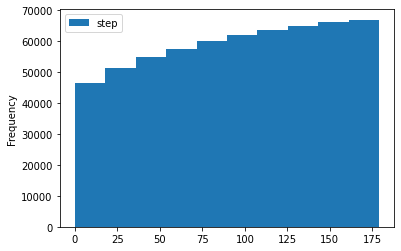

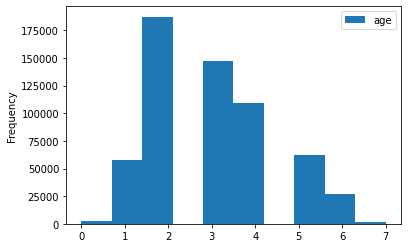

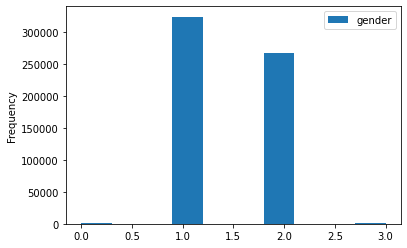

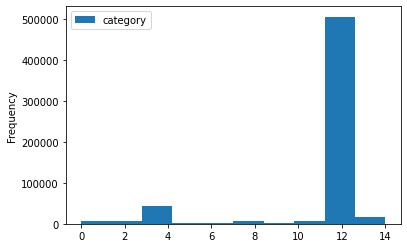

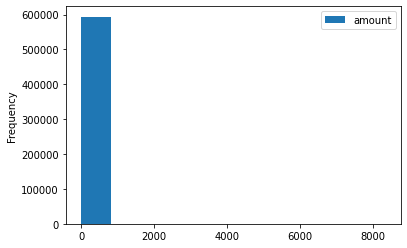

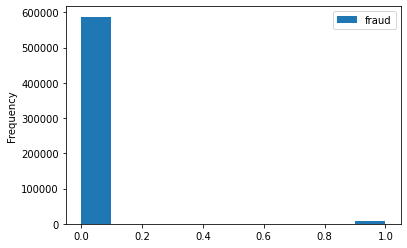

In [29]:
import matplotlib.pyplot as plt
for i in df.columns:
  df[i].plot.hist( legend=True )
  plt.show()

In [30]:
# Using MinMax Scaler
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

In [72]:
## Training And Evaluating Models

## KNN
## Forest
## HGBOOST
## XGBOOST

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb
from sklearn import metrics

def knnTrainAndFit(X_train, X_test, y_train, y_test, k=0):

  if k == 0:
    k = int( (len(y_train) + len(y_test)) ** 0.5 )

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  prec = metrics.precision_score(y_test, y_pred)
  rec = metrics.recall_score(y_test, y_pred)
  fone = metrics.f1_score(y_test, y_pred)

  print(f"K -> {k} = ACC: {acc:.4f}, F1: {fone:.4f}, Recall: {rec:.4f}, Prec: {prec:.4f}")

def forestTrainAndFit(X_train, X_test, y_train, y_test, estimators, depth, impurity):

  forest = RandomForestClassifier(n_estimators=estimators,max_depth=depth,random_state=42,
                                verbose=0,class_weight="balanced", min_impurity_decrease=impurity)
  forest.fit(X_train, y_train)

  y_pred = forest.predict(X_test)
  probs = forest.predict_proba(X_test)

  auc = metrics.roc_auc_score(y_test, probs[:,1])
  acc = metrics.accuracy_score(y_test, y_pred)
  prec = metrics.precision_score(y_test, y_pred)
  rec = metrics.recall_score(y_test, y_pred)
  fone = metrics.f1_score(y_test, y_pred)

  print(f"Estim -> {estimators} = Depth: {depth}, Impurity: {impurity}, Acurácia: {acc:.4f}, F1 Score: {fone:.4f}, AUC: {auc:.4f}, Recall: {rec:.4f}, Prec: {prec:.4f}")

def hgboostTrainAndFit(X_train, X_test, y_train, y_test, depth):

  hg = HistGradientBoostingClassifier(max_depth=depth, random_state=77)
  hg.fit(X_train, y_train)

  y_pred = hg.predict(X_test)
  probs = hg.predict_proba(X_test)

  auc = metrics.roc_auc_score(y_test, probs[:,1])
  acc = metrics.accuracy_score(y_test, y_pred)
  prec = metrics.precision_score(y_test, y_pred)
  rec = metrics.recall_score(y_test, y_pred)
  fone = metrics.f1_score(y_test, y_pred)

  print(f"Depth -> {depth}, Acurácia: {acc:.4f}, F1 Score: {fone:.4f}, AUC: {auc:.4f}, Recall: {rec:.4f}, Prec: {prec:.4f}")

def xgboostTrainAndFit(X_train, X_test, y_train, y_test, estimators, depth):

  xg = xgb.XGBClassifier(n_estimators=estimators, max_depth=depth, booster='gbtree', learning_rate=0.01, verbosity=0, silent=True)
  xg.fit(X_train, y_train, eval_set=[(X_train, y_train)])

  y_pred = xg.predict(X_test)
  probs = xg.predict_proba(X_test)

  auc = metrics.roc_auc_score(y_test, probs[:,1])
  acc = metrics.accuracy_score(y_test, y_pred)
  prec = metrics.precision_score(y_test, y_pred)
  rec = metrics.recall_score(y_test, y_pred)
  fone = metrics.f1_score(y_test, y_pred)

  print(f"Estim -> {estimators} = Depth: {depth}, Acurácia: {acc:.4f}, F1 Score: {fone:.4f}, AUC: {auc:.4f}, Recall: {rec:.4f}, Prec: {prec:.4f}")

In [33]:
## Tests With KNN

knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 1)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 2)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 3)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 5)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 6)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 7)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 8)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 9)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 10)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 11)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 12)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 13)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 14)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 15)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 16)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 17)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 19)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 20)

K -> 771 = ACC: 0.9881, F1: 0.0084, Recall: 0.0042, Prec: 1.0000
K -> 1 = ACC: 0.9910, F1: 0.6040, Recall: 0.5776, Prec: 0.6329
K -> 2 = ACC: 0.9928, F1: 0.5993, Recall: 0.4499, Prec: 0.8973
K -> 3 = ACC: 0.9928, F1: 0.6354, Recall: 0.5261, Prec: 0.8022
K -> 4 = ACC: 0.9926, F1: 0.5841, Recall: 0.4358, Prec: 0.8854
K -> 5 = ACC: 0.9927, F1: 0.6112, Recall: 0.4795, Prec: 0.8426
K -> 6 = ACC: 0.9923, F1: 0.5643, Recall: 0.4161, Prec: 0.8767
K -> 7 = ACC: 0.9924, F1: 0.5792, Recall: 0.4408, Prec: 0.8446
K -> 8 = ACC: 0.9920, F1: 0.5390, Recall: 0.3900, Prec: 0.8722
K -> 9 = ACC: 0.9921, F1: 0.5570, Recall: 0.4189, Prec: 0.8308
K -> 10 = ACC: 0.9918, F1: 0.5199, Recall: 0.3731, Prec: 0.8574
K -> 11 = ACC: 0.9919, F1: 0.5407, Recall: 0.3977, Prec: 0.8443
K -> 12 = ACC: 0.9916, F1: 0.5008, Recall: 0.3526, Prec: 0.8636
K -> 13 = ACC: 0.9918, F1: 0.5215, Recall: 0.3766, Prec: 0.8476
K -> 14 = ACC: 0.9914, F1: 0.4820, Recall: 0.3350, Prec: 0.8590
K -> 15 = ACC: 0.9915, F1: 0.4980, Recall: 0.354

In [34]:
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 1, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 5, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 10, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 11, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 12, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 13, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 14, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 15, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 16, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 17, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 19, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 20, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 22, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 24, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 26, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 28, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 30, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 35, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 40, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 45, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 50, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 60, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 70, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 90, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 100, 5, 0.0001)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Estim -> 1 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9881, F1 Score: 0.0000, AUC: 0.5000, Recall: 0.0000, Prec: 0.0000
Estim -> 5 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9889, F1 Score: 0.1627, AUC: 0.9687, Recall: 0.0903, Prec: 0.8258
Estim -> 10 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9934, F1 Score: 0.6375, AUC: 0.9849, Recall: 0.4880, Prec: 0.9190
Estim -> 11 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9935, F1 Score: 0.6487, AUC: 0.9849, Recall: 0.5014, Prec: 0.9186
Estim -> 12 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9935, F1 Score: 0.6459, AUC: 0.9848, Recall: 0.4979, Prec: 0.9193
Estim -> 13 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9915, F1 Score: 0.4592, AUC: 0.9848, Recall: 0.3039, Prec: 0.9390
Estim -> 14 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9934, F1 Score: 0.6422, AUC: 0.9851, Recall: 0.4929, Prec: 0.9209
Estim -> 15 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9915, F1 Score: 0.4578, AUC: 0.9851, Recall: 0.3025, Prec: 0.9408
Estim -> 16 = Depth: 5, Impurity: 0.0001, 

In [35]:
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 1, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 2, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 3, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 4, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 7, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 8, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 9, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 10, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 11, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 12, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 13, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 14, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 15, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 20, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 25, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 30, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 35, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 40, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 45, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 50, 0.0001)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Estim -> 18 = Depth: 1, Impurity: 0.0001, Acurácia: 0.9881, F1 Score: 0.0000, AUC: 0.9429, Recall: 0.0000, Prec: 0.0000
Estim -> 18 = Depth: 2, Impurity: 0.0001, Acurácia: 0.9915, F1 Score: 0.4680, AUC: 0.9845, Recall: 0.3117, Prec: 0.9384
Estim -> 18 = Depth: 3, Impurity: 0.0001, Acurácia: 0.9940, F1 Score: 0.6838, AUC: 0.9860, Recall: 0.5451, Prec: 0.9170
Estim -> 18 = Depth: 4, Impurity: 0.0001, Acurácia: 0.9938, F1 Score: 0.6688, AUC: 0.9861, Recall: 0.5233, Prec: 0.9263
Estim -> 18 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9940, F1 Score: 0.6842, AUC: 0.9862, Recall: 0.5416, Prec: 0.9287
Estim -> 18 = Depth: 6, Impurity: 0.0001, Acurácia: 0.9941, F1 Score: 0.6876, AUC: 0.9854, Recall: 0.5480, Prec: 0.9228
Estim -> 18 = Depth: 7, Impurity: 0.0001, Acurácia: 0.9941, F1 Score: 0.6876, AUC: 0.9854, Recall: 0.5480, Prec: 0.9228
Estim -> 18 = Depth: 8, Impurity: 0.0001, Acurácia: 0.9941, F1 Score: 0.6876, AUC: 0.9854, Recall: 0.5480, Prec: 0.9228
Estim -> 18 = Depth: 9, Impurity: 0.0001

In [36]:
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.1)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.01)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.00001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.0000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.0000002)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.0000003)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.0000004)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.0000005)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.0000006)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.0000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.0000008)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.0000009)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.00000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.0000000001)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Estim -> 18 = Depth: 6, Impurity: 0.1, Acurácia: 0.9881, F1 Score: 0.0000, AUC: 0.5000, Recall: 0.0000, Prec: 0.0000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Estim -> 18 = Depth: 6, Impurity: 0.01, Acurácia: 0.9881, F1 Score: 0.0000, AUC: 0.8073, Recall: 0.0000, Prec: 0.0000
Estim -> 18 = Depth: 6, Impurity: 0.0001, Acurácia: 0.9941, F1 Score: 0.6876, AUC: 0.9854, Recall: 0.5480, Prec: 0.9228
Estim -> 18 = Depth: 6, Impurity: 1e-05, Acurácia: 0.9942, F1 Score: 0.6959, AUC: 0.9895, Recall: 0.5592, Prec: 0.9210
Estim -> 18 = Depth: 6, Impurity: 1e-06, Acurácia: 0.9944, F1 Score: 0.7132, AUC: 0.9915, Recall: 0.5839, Prec: 0.9159
Estim -> 18 = Depth: 6, Impurity: 1e-07, Acurácia: 0.9945, F1 Score: 0.7204, AUC: 0.9921, Recall: 0.5959, Prec: 0.9106
Estim -> 18 = Depth: 6, Impurity: 2e-07, Acurácia: 0.9944, F1 Score: 0.7176, AUC: 0.9922, Recall: 0.5924, Prec: 0.9101
Estim -> 18 = Depth: 6, Impurity: 3e-07, Acurácia: 0.9944, F1 Score: 0.7176, AUC: 0.9922, Recall: 0.5931, Prec: 0.9082
Estim -> 18 = Depth: 6, Impurity: 4e-07, Acurácia: 0.9944, F1 Score: 0.7170, AUC: 0.9919, Recall: 0.5924, Prec: 0.9081
Estim -> 18 = Depth: 6, Impurity: 5e-07, Acuráci

In [74]:
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 10, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 11, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 12, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 13, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 14, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 15, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 16, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 17, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 19, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 20, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 21, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 22, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 24, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 25, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 30, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 35, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 40, 6, 0.0000000001)

Estim -> 10 = Depth: 6, Impurity: 1e-10, Acurácia: 0.9399, F1 Score: 0.2778, AUC: 0.9911, Recall: 0.9697, Prec: 0.1621
Estim -> 11 = Depth: 6, Impurity: 1e-10, Acurácia: 0.9371, F1 Score: 0.2695, AUC: 0.9911, Recall: 0.9732, Prec: 0.1564
Estim -> 12 = Depth: 6, Impurity: 1e-10, Acurácia: 0.9408, F1 Score: 0.2808, AUC: 0.9909, Recall: 0.9697, Prec: 0.1642
Estim -> 13 = Depth: 6, Impurity: 1e-10, Acurácia: 0.9418, F1 Score: 0.2843, AUC: 0.9910, Recall: 0.9697, Prec: 0.1665
Estim -> 14 = Depth: 6, Impurity: 1e-10, Acurácia: 0.9410, F1 Score: 0.2819, AUC: 0.9910, Recall: 0.9704, Prec: 0.1649
Estim -> 15 = Depth: 6, Impurity: 1e-10, Acurácia: 0.9417, F1 Score: 0.2837, AUC: 0.9912, Recall: 0.9690, Prec: 0.1662
Estim -> 16 = Depth: 6, Impurity: 1e-10, Acurácia: 0.9410, F1 Score: 0.2817, AUC: 0.9912, Recall: 0.9704, Prec: 0.1648
Estim -> 17 = Depth: 6, Impurity: 1e-10, Acurácia: 0.9411, F1 Score: 0.2818, AUC: 0.9913, Recall: 0.9690, Prec: 0.1649
Estim -> 18 = Depth: 6, Impurity: 1e-10, Acuráci

In [75]:
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 1, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 2, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 3, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 4, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 5, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 6, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 7, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 8, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 9, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 10, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 11, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 12, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 13, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 14, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 15, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 20, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 25, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 30, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 35, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 40, 0.0000000001)

Estim -> 23 = Depth: 1, Impurity: 1e-10, Acurácia: 0.9559, F1 Score: 0.3187, AUC: 0.9666, Recall: 0.8660, Prec: 0.1953
Estim -> 23 = Depth: 2, Impurity: 1e-10, Acurácia: 0.9565, F1 Score: 0.3235, AUC: 0.9800, Recall: 0.8724, Prec: 0.1986
Estim -> 23 = Depth: 3, Impurity: 1e-10, Acurácia: 0.9499, F1 Score: 0.3020, AUC: 0.9847, Recall: 0.9090, Prec: 0.1811
Estim -> 23 = Depth: 4, Impurity: 1e-10, Acurácia: 0.9437, F1 Score: 0.2881, AUC: 0.9894, Recall: 0.9556, Prec: 0.1697
Estim -> 23 = Depth: 5, Impurity: 1e-10, Acurácia: 0.9409, F1 Score: 0.2805, AUC: 0.9901, Recall: 0.9661, Prec: 0.1640
Estim -> 23 = Depth: 6, Impurity: 1e-10, Acurácia: 0.9424, F1 Score: 0.2859, AUC: 0.9912, Recall: 0.9676, Prec: 0.1677
Estim -> 23 = Depth: 7, Impurity: 1e-10, Acurácia: 0.9442, F1 Score: 0.2921, AUC: 0.9914, Recall: 0.9647, Prec: 0.1721
Estim -> 23 = Depth: 8, Impurity: 1e-10, Acurácia: 0.9460, F1 Score: 0.2985, AUC: 0.9916, Recall: 0.9633, Prec: 0.1766
Estim -> 23 = Depth: 9, Impurity: 1e-10, Acuráci

In [78]:
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 17, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 18, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 19, 0.0000000001)

Estim -> 23 = Depth: 16.5, Impurity: 1e-10, Acurácia: 0.9832, F1 Score: 0.5312, AUC: 0.9878, Recall: 0.8004, Prec: 0.3975
Estim -> 23 = Depth: 17, Impurity: 1e-10, Acurácia: 0.9866, F1 Score: 0.5731, AUC: 0.9832, Recall: 0.7518, Prec: 0.4631
Estim -> 23 = Depth: 18, Impurity: 1e-10, Acurácia: 0.9891, F1 Score: 0.6140, AUC: 0.9804, Recall: 0.7264, Prec: 0.5318
Estim -> 23 = Depth: 19, Impurity: 1e-10, Acurácia: 0.9910, F1 Score: 0.6533, AUC: 0.9755, Recall: 0.7137, Prec: 0.6024


In [80]:
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.1)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.01)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.00001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.0000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.00000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.00000002)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.00000003)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.00000004)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.00000005)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.00000006)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.00000008)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.00000009)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.0000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.00000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 23, 16, 0.000000000001)

Estim -> 23 = Depth: 16, Impurity: 0.1, Acurácia: 0.9564, F1 Score: 0.3213, AUC: 0.9730, Recall: 0.8660, Prec: 0.1972
Estim -> 23 = Depth: 16, Impurity: 0.01, Acurácia: 0.9553, F1 Score: 0.3175, AUC: 0.9793, Recall: 0.8724, Prec: 0.1940
Estim -> 23 = Depth: 16, Impurity: 0.001, Acurácia: 0.9342, F1 Score: 0.2599, AUC: 0.9838, Recall: 0.9690, Prec: 0.1501
Estim -> 23 = Depth: 16, Impurity: 0.0001, Acurácia: 0.9439, F1 Score: 0.2912, AUC: 0.9901, Recall: 0.9669, Prec: 0.1714
Estim -> 23 = Depth: 16, Impurity: 1e-05, Acurácia: 0.9706, F1 Score: 0.4225, AUC: 0.9915, Recall: 0.9020, Prec: 0.2758
Estim -> 23 = Depth: 16, Impurity: 1e-06, Acurácia: 0.9806, F1 Score: 0.5095, AUC: 0.9894, Recall: 0.8456, Prec: 0.3645
Estim -> 23 = Depth: 16, Impurity: 1e-07, Acurácia: 0.9822, F1 Score: 0.5242, AUC: 0.9881, Recall: 0.8202, Prec: 0.3852
Estim -> 23 = Depth: 16, Impurity: 1e-08, Acurácia: 0.9838, F1 Score: 0.5392, AUC: 0.9874, Recall: 0.7955, Prec: 0.4078
Estim -> 23 = Depth: 16, Impurity: 2e-08, 

In [83]:
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 1, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 2, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 3, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 5, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 6, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 7, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 8, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 9, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 10, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 12, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 14, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 16, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 20, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 22, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 24, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 26, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 28, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 30, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 35, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 40, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 45, 16, 0.00000007)

Estim -> 1 = Depth: 16, Impurity: 7e-08, Acurácia: 0.9749, F1 Score: 0.4319, AUC: 0.8994, Recall: 0.8011, Prec: 0.2957
Estim -> 2 = Depth: 16, Impurity: 7e-08, Acurácia: 0.9835, F1 Score: 0.5142, AUC: 0.9446, Recall: 0.7341, Prec: 0.3957
Estim -> 3 = Depth: 16, Impurity: 7e-08, Acurácia: 0.9780, F1 Score: 0.4714, AUC: 0.9634, Recall: 0.8209, Prec: 0.3306
Estim -> 4 = Depth: 16, Impurity: 7e-08, Acurácia: 0.9809, F1 Score: 0.4941, AUC: 0.9701, Recall: 0.7828, Prec: 0.3610
Estim -> 5 = Depth: 16, Impurity: 7e-08, Acurácia: 0.9804, F1 Score: 0.4987, AUC: 0.9744, Recall: 0.8166, Prec: 0.3590
Estim -> 6 = Depth: 16, Impurity: 7e-08, Acurácia: 0.9809, F1 Score: 0.4993, AUC: 0.9771, Recall: 0.7976, Prec: 0.3634
Estim -> 7 = Depth: 16, Impurity: 7e-08, Acurácia: 0.9812, F1 Score: 0.5078, AUC: 0.9798, Recall: 0.8152, Prec: 0.3687
Estim -> 8 = Depth: 16, Impurity: 7e-08, Acurácia: 0.9813, F1 Score: 0.5070, AUC: 0.9812, Recall: 0.8047, Prec: 0.3701
Estim -> 9 = Depth: 16, Impurity: 7e-08, Acuráci

In [84]:
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 1, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 2, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 3, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 4, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 7, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 8, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 9, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 10, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 11, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 12, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 13, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 14, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 15, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 16, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 17, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 18, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 19, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 20, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 22, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 24, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 26, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 28, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 30, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 32, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 34, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 36, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 38, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 40, 0.00000007)

Estim -> 18 = Depth: 1, Impurity: 7e-08, Acurácia: 0.9558, F1 Score: 0.3200, AUC: 0.9668, Recall: 0.8717, Prec: 0.1960
Estim -> 18 = Depth: 2, Impurity: 7e-08, Acurácia: 0.9543, F1 Score: 0.3161, AUC: 0.9804, Recall: 0.8858, Prec: 0.1924
Estim -> 18 = Depth: 3, Impurity: 7e-08, Acurácia: 0.9373, F1 Score: 0.2691, AUC: 0.9851, Recall: 0.9690, Prec: 0.1563
Estim -> 18 = Depth: 4, Impurity: 7e-08, Acurácia: 0.9428, F1 Score: 0.2852, AUC: 0.9896, Recall: 0.9577, Prec: 0.1676
Estim -> 18 = Depth: 5, Impurity: 7e-08, Acurácia: 0.9403, F1 Score: 0.2788, AUC: 0.9900, Recall: 0.9683, Prec: 0.1629
Estim -> 18 = Depth: 6, Impurity: 7e-08, Acurácia: 0.9406, F1 Score: 0.2803, AUC: 0.9913, Recall: 0.9704, Prec: 0.1638
Estim -> 18 = Depth: 7, Impurity: 7e-08, Acurácia: 0.9439, F1 Score: 0.2909, AUC: 0.9913, Recall: 0.9654, Prec: 0.1713
Estim -> 18 = Depth: 8, Impurity: 7e-08, Acurácia: 0.9450, F1 Score: 0.2946, AUC: 0.9916, Recall: 0.9633, Prec: 0.1739
Estim -> 18 = Depth: 9, Impurity: 7e-08, Acuráci

In [92]:
# forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 20, 29, 0.00000007)
# forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 22, 31, 0.00000007)
# forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 24, 100, 0.00000007)
# forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 26, 60, 0.00000007)
# forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 28, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 30, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 40, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 50, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 51, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 52, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 53, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 54, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 55, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 56, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 57, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 58, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 59, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 60, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 65, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 70, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 75, 70, 0.00000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 70, 0.00000007)

Estim -> 30 = Depth: 70, Impurity: 7e-08, Acurácia: 0.9936, F1 Score: 0.7257, AUC: 0.9641, Recall: 0.7080, Prec: 0.7443
Estim -> 40 = Depth: 70, Impurity: 7e-08, Acurácia: 0.9937, F1 Score: 0.7273, AUC: 0.9693, Recall: 0.7073, Prec: 0.7485
Estim -> 50 = Depth: 70, Impurity: 7e-08, Acurácia: 0.9938, F1 Score: 0.7312, AUC: 0.9737, Recall: 0.7116, Prec: 0.7519
Estim -> 51 = Depth: 70, Impurity: 7e-08, Acurácia: 0.9937, F1 Score: 0.7315, AUC: 0.9748, Recall: 0.7158, Prec: 0.7480
Estim -> 52 = Depth: 70, Impurity: 7e-08, Acurácia: 0.9938, F1 Score: 0.7313, AUC: 0.9748, Recall: 0.7102, Prec: 0.7537
Estim -> 53 = Depth: 70, Impurity: 7e-08, Acurácia: 0.9937, F1 Score: 0.7302, AUC: 0.9752, Recall: 0.7137, Prec: 0.7474
Estim -> 54 = Depth: 70, Impurity: 7e-08, Acurácia: 0.9938, F1 Score: 0.7310, AUC: 0.9755, Recall: 0.7102, Prec: 0.7532
Estim -> 55 = Depth: 70, Impurity: 7e-08, Acurácia: 0.9938, F1 Score: 0.7322, AUC: 0.9759, Recall: 0.7144, Prec: 0.7509
Estim -> 56 = Depth: 70, Impurity: 7e-08

In [38]:
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 0, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 1, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 2, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 3, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 5, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 6, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 7, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 8, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 9, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 10, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 15, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 20, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 25, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 30, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 35, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 40, 5)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Estim -> 0 = Depth: 5, Acurácia: 0.9881, F1 Score: 0.0000, AUC: 0.5000, Recall: 0.0000, Prec: 0.0000
[0]	validation_0-error:0.005272
Estim -> 1 = Depth: 5, Acurácia: 0.9946, F1 Score: 0.7257, AUC: 0.9879, Recall: 0.5952, Prec: 0.9295
[0]	validation_0-error:0.005272
[1]	validation_0-error:0.005272
Estim -> 2 = Depth: 5, Acurácia: 0.9946, F1 Score: 0.7257, AUC: 0.9879, Recall: 0.5952, Prec: 0.9295
[0]	validation_0-error:0.005272
[1]	validation_0-error:0.005272
[2]	validation_0-error:0.005272
Estim -> 3 = Depth: 5, Acurácia: 0.9946, F1 Score: 0.7257, AUC: 0.9879, Recall: 0.5952, Prec: 0.9295
[0]	validation_0-error:0.005272
[1]	validation_0-error:0.005272
[2]	validation_0-error:0.005272
[3]	validation_0-error:0.005272
Estim -> 4 = Depth: 5, Acurácia: 0.9946, F1 Score: 0.7257, AUC: 0.9886, Recall: 0.5952, Prec: 0.9295
[0]	validation_0-error:0.005272
[1]	validation_0-error:0.005272
[2]	validation_0-error:0.005272
[3]	validation_0-error:0.005272
[4]	validation_0-error:0.005272
Estim -> 5 = De

In [39]:
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 40, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 45, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 50, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 55, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 60, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 65, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 70, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 75, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 85, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 90, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 95, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 100, 5)

[0]	validation_0-error:0.005272
[1]	validation_0-error:0.005272
[2]	validation_0-error:0.005272
[3]	validation_0-error:0.005272
[4]	validation_0-error:0.005272
[5]	validation_0-error:0.005264
[6]	validation_0-error:0.005264
[7]	validation_0-error:0.005264
[8]	validation_0-error:0.005264
[9]	validation_0-error:0.005264
[10]	validation_0-error:0.005264
[11]	validation_0-error:0.005266
[12]	validation_0-error:0.005255
[13]	validation_0-error:0.005253
[14]	validation_0-error:0.005253
[15]	validation_0-error:0.005255
[16]	validation_0-error:0.005255
[17]	validation_0-error:0.005234
[18]	validation_0-error:0.005234
[19]	validation_0-error:0.005236
[20]	validation_0-error:0.005236
[21]	validation_0-error:0.005236
[22]	validation_0-error:0.005234
[23]	validation_0-error:0.005236
[24]	validation_0-error:0.005236
[25]	validation_0-error:0.005236
[26]	validation_0-error:0.005236
[27]	validation_0-error:0.005236
[28]	validation_0-error:0.005236
[29]	validation_0-error:0.005236
[30]	validation_0-er

In [45]:
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 1)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 2)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 3)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 4)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 6)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 7)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 8)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 9)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 10)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 15)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 20)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 25)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 30)


[0]	validation_0-error:0.006466
[1]	validation_0-error:0.006399
[2]	validation_0-error:0.006466
[3]	validation_0-error:0.006399
[4]	validation_0-error:0.006399
[5]	validation_0-error:0.006466
[6]	validation_0-error:0.006399
[7]	validation_0-error:0.006466
[8]	validation_0-error:0.006399
[9]	validation_0-error:0.006399
[10]	validation_0-error:0.006399
[11]	validation_0-error:0.006399
[12]	validation_0-error:0.006399
[13]	validation_0-error:0.006399


KeyboardInterrupt: ignored

In [47]:
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 1)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 2)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 3)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 5)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 6)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 7)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 8)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 9)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 10)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 11)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 12)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 13)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 14)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 16)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 20)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 25)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 30)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 40)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 50)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 60)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 70)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 90)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 100)

Depth -> 1, Acurácia: 0.9937, F1 Score: 0.6767, AUC: 0.9893, Recall: 0.5536, Prec: 0.8703
Depth -> 2, Acurácia: 0.9943, F1 Score: 0.7230, AUC: 0.9922, Recall: 0.6276, Prec: 0.8525
Depth -> 3, Acurácia: 0.9945, F1 Score: 0.7311, AUC: 0.9927, Recall: 0.6269, Prec: 0.8767
Depth -> 4, Acurácia: 0.9945, F1 Score: 0.7355, AUC: 0.9930, Recall: 0.6382, Prec: 0.8677
Depth -> 5, Acurácia: 0.9945, F1 Score: 0.7340, AUC: 0.9930, Recall: 0.6333, Prec: 0.8727
Depth -> 6, Acurácia: 0.9946, F1 Score: 0.7331, AUC: 0.9930, Recall: 0.6276, Prec: 0.8812
Depth -> 7, Acurácia: 0.9945, F1 Score: 0.7318, AUC: 0.9930, Recall: 0.6255, Prec: 0.8817
Depth -> 8, Acurácia: 0.9946, F1 Score: 0.7329, AUC: 0.9930, Recall: 0.6269, Prec: 0.8819
Depth -> 9, Acurácia: 0.9946, F1 Score: 0.7348, AUC: 0.9929, Recall: 0.6312, Prec: 0.8792
Depth -> 10, Acurácia: 0.9946, F1 Score: 0.7332, AUC: 0.9930, Recall: 0.6269, Prec: 0.8828
Depth -> 11, Acurácia: 0.9946, F1 Score: 0.7371, AUC: 0.9930, Recall: 0.6326, Prec: 0.8829
Depth ->

In [48]:
from sklearn.neural_network import MLPClassifier

def mlpClassifierTrainer(X_train, X_test, y_train, y_test, layers : tuple, iter):
  mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=iter, random_state=777)
  mlp.fit(X_train, y_train)

  y_pred = mlp.predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  prec = metrics.precision_score(y_test, y_pred)
  rec = metrics.recall_score(y_test, y_pred)
  fone = metrics.f1_score(y_test, y_pred)

  print(f"Layers -> {layers}, MaxIter -> {iter} = ACC: {acc:.4f}, F1: {fone:.4f}, Recall: {rec:.4f}, Prec: {prec:.4f}")

In [ ]:
# mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (1, ), 200)
# mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (3, ), 200)
# mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (6, ), 200)
# mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (9, ), 200)
# mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (12, ), 200)
# mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (15, ), 200)
# mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (18, ), 200)
# mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (21, ), 200)
# mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (24, ), 200)
# mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (27, ), 200)
# mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (30, ), 200)
mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (40, ), 20)
mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (50, ), 20)
mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (60, ), 20)
mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (70, ), 20)
mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (80, ), 20)
mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (90, ), 20)
mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (100, ), 20)

In [61]:
mlpClassifierTrainer(X_train_norm, X_test_norm, Y_train, Y_test, (5, 4, 3), 200)

Layers -> (5, 4, 3), MaxIter -> 200 = ACC: 0.9940, F1: 0.7021, Recall: 0.5966, Prec: 0.8528


In [71]:
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=30,random_state=42,
                                verbose=0,class_weight="balanced")

rf_clf.fit(X_train_norm,Y_train)
y_pred = rf_clf.predict(X_test_norm)

acc = metrics.accuracy_score(Y_test, y_pred)
prec = metrics.precision_score(Y_test, y_pred)
rec = metrics.recall_score(Y_test, y_pred)
fone = metrics.f1_score(Y_test, y_pred)

print(f"N_Est -> 100, Depth -> 8 = ACC: {acc:.4f}, F1: {fone:.4f}, Recall: {rec:.4f}, Prec: {prec:.4f}")

N_Est -> 100, Depth -> 8 = ACC: 0.9787, F1: 0.4809, Recall: 0.8265, Prec: 0.3391


In [67]:
XGBoost_CLF = xgb.XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=400, 
                                objective="binary:hinge", booster='gbtree', 
                                n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
                                subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                                scale_pos_weight=1, base_score=0.5, random_state=42)

XGBoost_CLF.fit(X_train_norm,Y_train)
y_pred = XGBoost_CLF.predict(X_test_norm)
acc = metrics.accuracy_score(Y_test, y_pred)
prec = metrics.precision_score(Y_test, y_pred)
rec = metrics.recall_score(Y_test, y_pred)
fone = metrics.f1_score(Y_test, y_pred)

print(f"N_Est -> 400, Depth -> 6 = ACC: {acc:.4f}, F1: {fone:.4f}, Recall: {rec:.4f}, Prec: {prec:.4f}")

N_Est -> 400, Depth -> 6 = ACC: 0.9947, F1: 0.7423, Recall: 0.6347, Prec: 0.8937


In [93]:
from joblib import dump, load

In [94]:
def forestTrainAndFit(X_train, X_test, y_train, y_test, estimators, depth, impurity):

  forest = RandomForestClassifier(n_estimators=estimators,max_depth=depth,random_state=42,
                                verbose=0,class_weight="balanced", min_impurity_decrease=impurity)
  forest.fit(X_train, y_train)

  y_pred = forest.predict(X_test)
  probs = forest.predict_proba(X_test)

  auc = metrics.roc_auc_score(y_test, probs[:,1])
  acc = metrics.accuracy_score(y_test, y_pred)
  prec = metrics.precision_score(y_test, y_pred)
  rec = metrics.recall_score(y_test, y_pred)
  fone = metrics.f1_score(y_test, y_pred)

  return forest

forest = forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 51, 70, 0.00000007)

In [95]:
dump(forest, 'RandomForestClassifierCyberSprint.joblib') 

['RandomForestClassifierCyberSprint.joblib']

In [ ]:
dump(norm, 'MinMaxScalerHGBoostCyberSprint.joblib')

['MinMaxScalerHGBoostCyberSprint.joblib']